<a href="https://colab.research.google.com/github/SusannaPinotti/SWOntology/blob/main/Netflix_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
try: 
  import pycaret
except: 
  !pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [4]:
import pandas as pd

In [5]:
from pycaret.utils import enable_colab 
enable_colab()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Colab mode enabled.


In [18]:
data = pd.read_csv('/content/drive/MyDrive/csv_topics.csv', encoding_errors= 'ignore')

In [19]:
data.head()

,id,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,...,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,Assigned topic
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,6.533447,23407.194988,0.600,6.818039,...,0.000733,0.001865,0.213043,0.000635,0.001487,0.001168,0.000955,0.001156,0.001257,topic_0
1,tm84618,Taxi Driver,MOVIE,1976,R,113,8.300000,795222.000000,27.612,8.200000,...,0.000468,0.001192,0.000779,0.000406,0.993612,0.000747,0.000611,0.000739,0.000803,topic_5
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.200000,530877.000000,18.216,7.800000,...,0.995789,0.000731,0.000477,0.000249,0.000583,0.000458,0.000374,0.000453,0.000492,topic_1
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.200000,530877.000000,18.216,7.800000,...,0.995789,0.000731,0.000477,0.000249,0.000583,0.000458,0.000374,0.000453,0.000492,topic_1
4,tm70993,Life of Brian,MOVIE,1979,R,94,8.000000,392419.000000,17.505,7.800000,...,0.000279,0.189072,0.081191,0.000242,0.000567,0.000445,0.000364,0.013895,0.000479,topic_0


In [21]:
data.shape


(6316, 26)

In [22]:
target = 'genere_target'

In [15]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [23]:
pre = setup(data = data, target = target, session_id=123) 

,Description,Value
0,session_id,123
1,Target,genere_target
2,Target Type,Multiclass
3,Label Encoded,"action: 0, animation: 1, comedy: 2, crime: 3, ..."
4,Original Data,"(6316, 26)"
5,Missing Values,True
6,Numeric Features,16
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best = compare_models(fold = 3) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6044,0.9055,0.3752,0.5963,0.5850,0.5238,0.5275,4.1167
et,Extra Trees Classifier,0.5709,0.8912,0.3396,0.5710,0.5460,0.4790,0.4852,6.0300
gbc,Gradient Boosting Classifier,0.5596,0.8793,0.2982,0.5602,0.5296,0.4615,0.4701,229.4167
rf,Random Forest Classifier,0.5591,0.8903,0.3132,0.5845,0.5277,0.4584,0.4684,4.2967
dt,Decision Tree Classifier,0.4746,0.6939,0.3213,0.4685,0.4700,0.3833,0.3836,0.5233
lda,Linear Discriminant Analysis,0.4379,0.7651,0.2518,0.4801,0.4212,0.3293,0.3329,32.2533
ada,Ada Boost Classifier,0.3097,0.5289,0.0957,0.2297,0.2066,0.1007,0.1595,4.2700
lr,Logistic Regression,0.2870,0.6299,0.0647,0.1546,0.1862,0.0665,0.0774,96.4633
ridge,Ridge Classifier,0.2778,0.0000,0.0628,0.1345,0.1804,0.0559,0.0650,5.9567
knn,K Neighbors Classifier,0.2542,0.5949,0.1086,0.2193,0.2281,0.0981,0.0998,5.5933


In [25]:
lgbm = create_model('lightgbm', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6119,0.9073,0.3657,0.6003,0.5933,0.5346,0.5374
1,0.6058,0.9077,0.3826,0.5956,0.5860,0.5252,0.5292
2,0.5954,0.9016,0.3772,0.5931,0.5759,0.5116,0.5158
Mean,0.6044,0.9055,0.3752,0.5963,0.5850,0.5238,0.5275
Std,0.0068,0.0028,0.0070,0.0030,0.0071,0.0095,0.0089


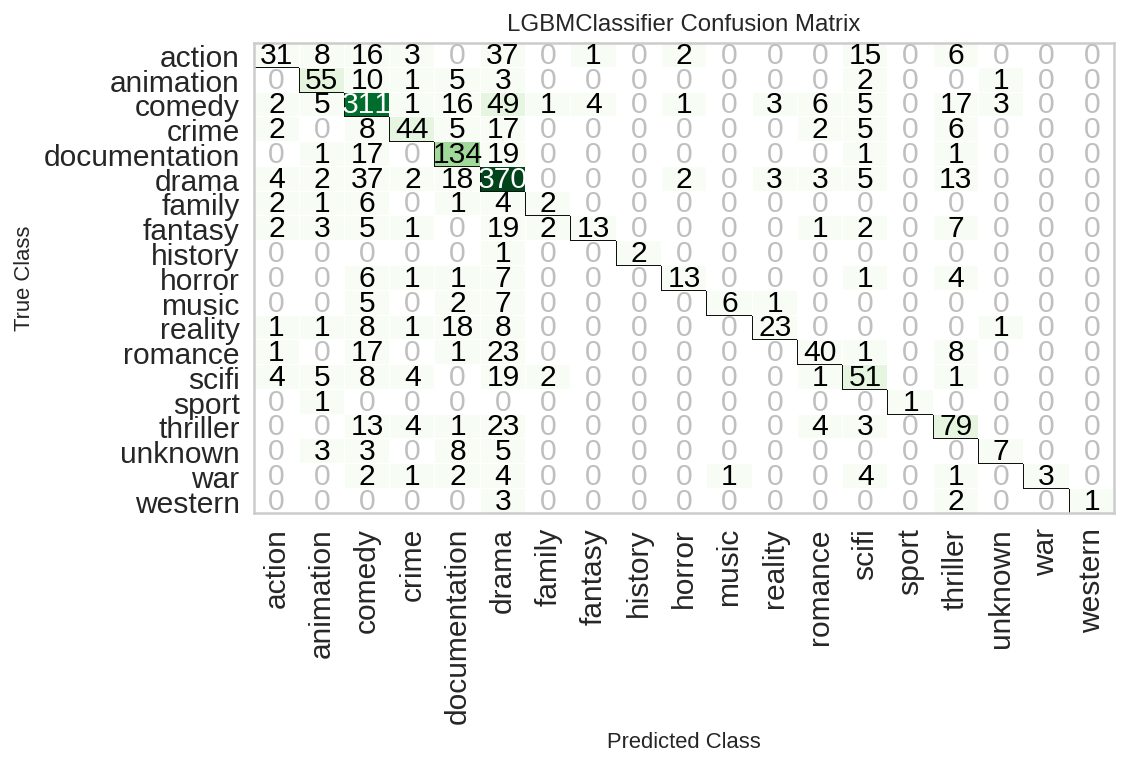

In [26]:
plot_model(lgbm, plot = 'confusion_matrix')

In [27]:
tuned_lgbm = tune_model(lgbm, fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5855,0.8980,0.3408,0.5656,0.5678,0.5061,0.5077
1,0.5746,0.8995,0.3838,0.5715,0.5584,0.4902,0.4932
2,0.5642,0.8883,0.3676,0.5578,0.5451,0.4749,0.4787
Mean,0.5748,0.8953,0.3640,0.5650,0.5571,0.4904,0.4932
Std,0.0087,0.0050,0.0178,0.0056,0.0093,0.0128,0.0118


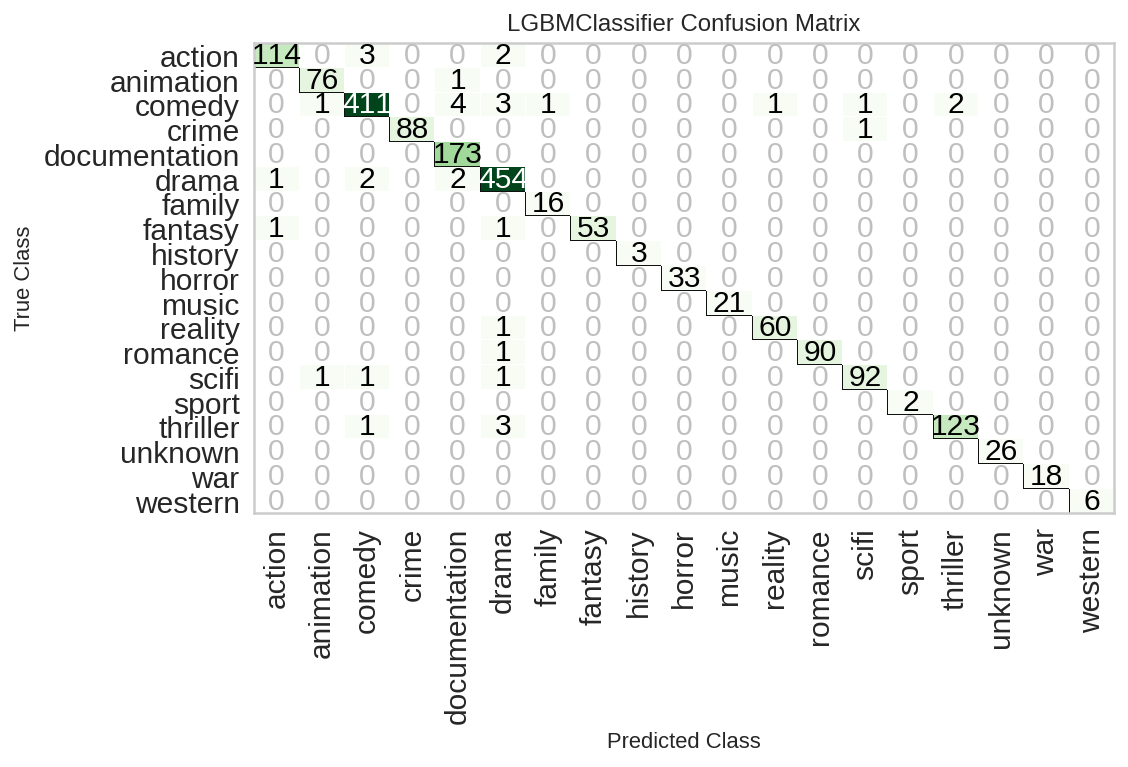

In [28]:
final = finalize_model(tuned_lgbm)
plot_model(final, plot = 'confusion_matrix')